# Introduction 
The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consits of 60,000 color images of size 32 x 32 collected by by Krizhevsky, Nair, and Hinton. The dataset has 10 classes, each class having 6,000 images which is divided in to two groups: 
* Training: 50,000 images 
* Testing: 10,000 images 


The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

In the following, you will apply different algorithms to the task of object recognition in the images of the aforementioned dataset. Above each cell is a text file with a task for you to complete. 





Importing required packages

In [3]:
import os
import pickle
from collections import Counter

import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras import Input, Model, layers, losses, callbacks, optimizers, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* Load the data, rescale it and split it into training (train_size=10000), validation (train_size=1000) and test set (train_size=1000)
* Print the shape of your training set
* Print the number of samples in each class
* Compute the mean and standard deviation of your training and test set

In [5]:
# Code for loading the data 
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Classes (are given)
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# Code for printing the shape of your training set 
print(f'Shape of training dataset {train_images.shape}')
print(f'Shape of test dataset {test_images.shape}')

# Code for rescaling the images
train_images, test_images = train_images/255.0, test_images/255.0

# Code for splitting the data into train/val/test set 

# Code for printing the # of samples in each class 
print("Number of samples in each class of training samples")
print(Counter(np.squeeze(train_labels)))

print("Number of samples in each class of test samples")
print(Counter(np.squeeze(test_labels)))

# Code for computing the mean and std of the training and test set

Shape of training dataset (50000, 32, 32, 3)
Shape of test dataset (10000, 32, 32, 3)
Number of samples in each class of training samples
Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})
Number of samples in each class of test samples
Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})


Plot a 10 x 10 grid with some random data points, each row representing one of the 10 classes with 10 images from that class.

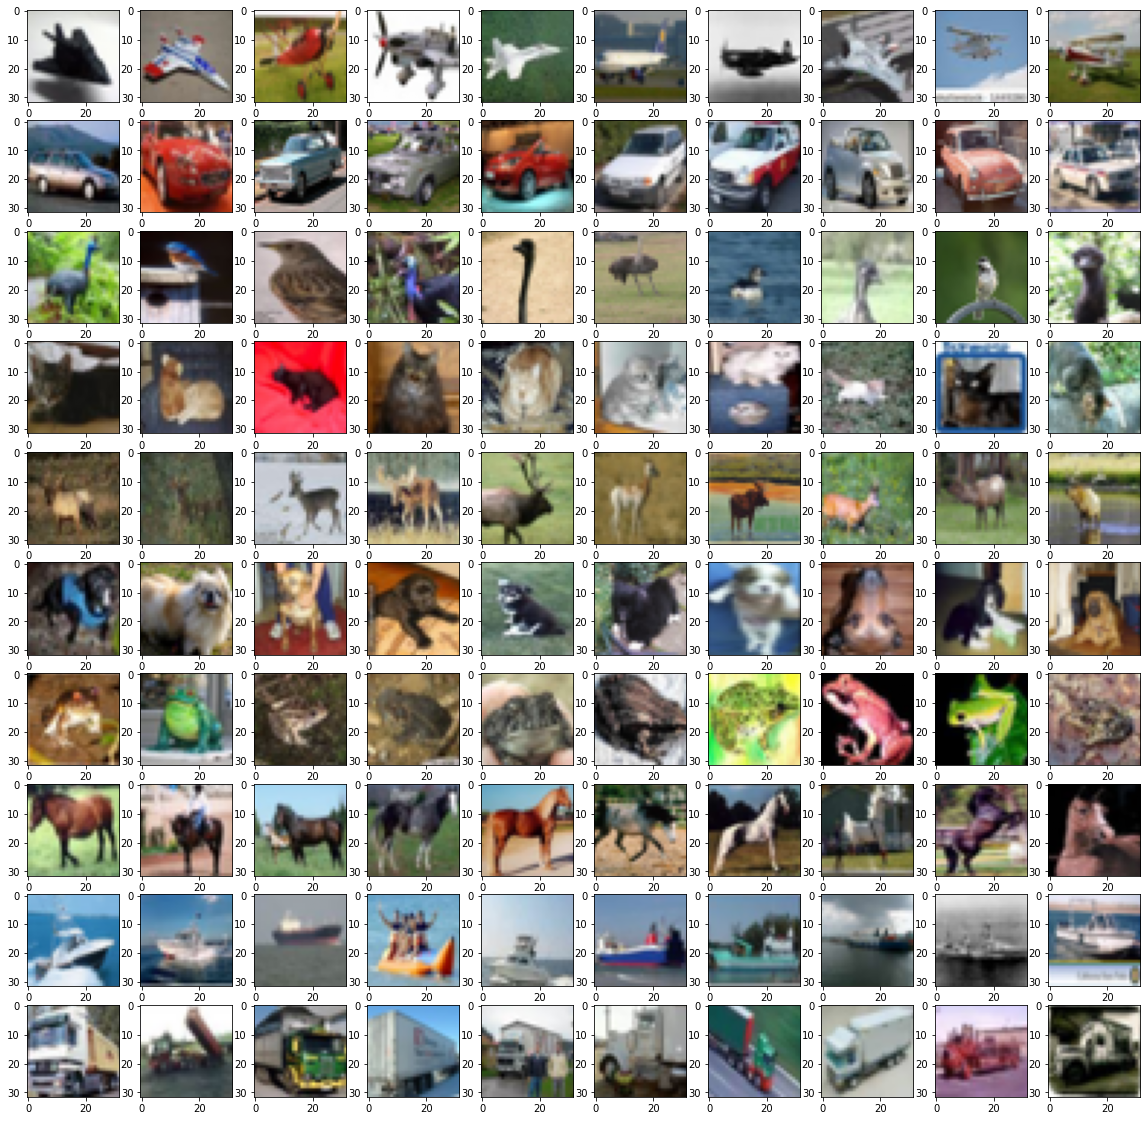

In [3]:
# Code for plotting 
plt.figure(figsize=(20,20))
for label in range(10):
    data = np.nonzero(np.squeeze(train_labels) == label)[0][0:10]
    for pos,j in enumerate(data):
        plt.subplot(10,10, (label*10)+pos+1)
        plt.imshow(train_images[j])


Use the convnet from first notebook (Convolutional Neural Network in tensorflow using keras API cell) and train on cifar-10 for **100** epochs. 
* Create a checkpoint to save the best model (see [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/))
* Use the trained model to make predictions on the test data
* Print the **classification_report**
* Print the **confusion_matrix**
* Plot training loss vs. validation loss
* Plot training accuracy vs. validation accuracy 


In [5]:
# Code for training on Cifar-10
#Convolutional Neural Network in tensorflow using keras API

def cifar_clf(input_shape=(32,32,3), n_classes=10):
    inx = Input(input_shape)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(inx)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(n_classes, activation='softmax')(x)
    return Model(inx, x)

clf_cifar = cifar_clf()
clf_cifar.summary()

# select loss function and optimizer
loss = losses.CategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=1e-2)
clf_cifar.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'], )

# callback for saving model
MdlCpt = callbacks.ModelCheckpoint('cpt/convnet_cifar', save_best_only=True)

hist = clf_cifar.fit(train_images, train_labels, epochs=100, batch_size=1000, shuffle=True, callbacks=[MdlCpt], validation_data=(test_images, test_labels))

2022-10-31 21:31:23.690061: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 21:31:23.691029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 21:31:24.020602: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 21:31:24.021552: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 21:31:24.022370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290  

2022-10-31 21:31:31.721802: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-31 21:31:34.952298: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


50/50 [==============================] - 16s 34ms/step - loss: 2.3969 - accuracy: 0.1481 - val_loss: 2.1325 - val_accuracy: 0.2090


2022-10-31 21:31:48.430917: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
50/50 [==============================] - 1s 23ms/step - loss: 2.1163 - accuracy: 0.2439 - val_loss: 2.0055 - val_accuracy: 0.2848
Epoch 3/100
50/50 [==============================] - 1s 23ms/step - loss: 1.9575 - accuracy: 0.3057 - val_loss: 1.7716 - val_accuracy: 0.3680
Epoch 4/100
50/50 [==============================] - 1s 25ms/step - loss: 1.7739 - accuracy: 0.3673 - val_loss: 1.6743 - val_accuracy: 0.4084
Epoch 5/100
50/50 [==============================] - 1s 22ms/step - loss: 1.6367 - accuracy: 0.4155 - val_loss: 1.5141 - val_accuracy: 0.4654
Epoch 6/100
50/50 [==============================] - 1s 24ms/step - loss: 1.5408 - accuracy: 0.4501 - val_loss: 1.5915 - val_accuracy: 0.4373
Epoch 7/100
50/50 [==============================] - 1s 22ms/step - loss: 1.4482 - accuracy: 0.4846 - val_loss: 1.4189 - val_accuracy: 0.4979
Epoch 8/100
50/50 [==============================] - 1s 22ms/step - loss: 1.3736 - accuracy: 0.5108 - val_loss: 1.4515 - val_accuracy: 0.4834
Epoch 

In [6]:
# Code for prediction 
image_pred = tf.argmax(clf_cifar(test_images), axis=-1)

In [1]:
# Code for classification report and confusion matric
print(classification_report(test_labels, image_pred))
print(confusion_matrix(test_labels, image_pred))

NameError: name 'classification_report' is not defined

Text(0.5, 0.98, 'Training progress')

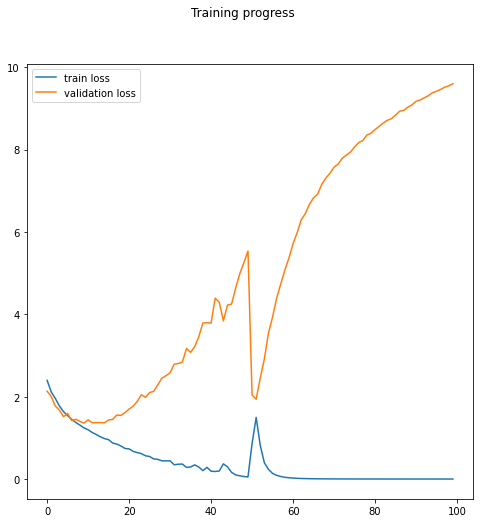

In [8]:
# Code for training loss vs. val loss
fig = plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend();
fig.suptitle('Training progress')

Text(0.5, 0.98, 'Training progress')

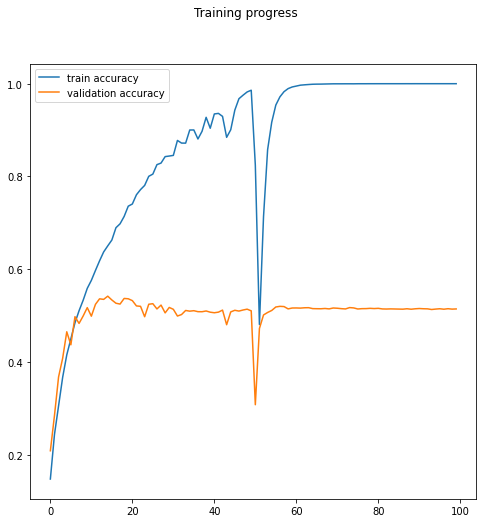

In [9]:
# Code for training acc vs. val acc
fig = plt.figure(figsize=(8,8))
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend();
fig.suptitle('Training progress')

Use your trained convnet as a feature extractor and feed the output of the flattened layer into a **Support Vector Machine**, which now acts as a classification head (fit an SVC to your training data). Then use the fitted SVC to make predictions on your test data. Print its classification report and the confusion matrix. 

In [50]:
# Code for the conv feature extractor + SCV classifier
#clf_cifar.get_layer(clf_cifar.flatten).get_weights()[0]
outputs = [layer.output for layer in clf_cifar.layers[1:]] 
visualization_model = tf.keras.models.Model(inputs = clf_cifar.input, outputs = outputs)
visualization_model

In [8]:
# Code for making predictions

In [9]:
# Code for printing classification report and confusion matrix

Implement a NN with the following structure: 
* Input layer -> Conv block 0 -> Conv block 1 -> Conv block 2 -> Conv block 3 -> Dense layer -> Output layer 
* Conv block 0: Conv2D(32, (3,3)) -> Conv2D(32, (3,3))
* Conv block 1: Conv2D(64, (3,3)) -> Conv2D(32, (3,3))
* Conv block 2: Conv2D(128, (3,3)) -> Conv2D(32, (3,3))
* Conv block 3: Conv2D(128, (3,3)) -> Conv2D(32, (3,3))
* Padding is always '**same**', kernel_initializer is '**he_uniform**', and activation function is '**relu**' 
* Dense layer: layers.Flatten() -> layers.Dense(512, activation='relu')
* Output layer: layers.Dense(10) 

* Train this model on the cifar-10 data for 100 epochs and make predictions on the test data
* Create a checkpoint to save the best model (see [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/))
* Print the classification report and confusion matrix
* Plot training loss vs. validation loss
* Plot Training accuracy vs. validation accuracy 
* Did the results improve in comparison to the last model? 

In [6]:
# Code for model 2 
def cifar_clf2(input_shape=(32,32,3), n_classes=10):
    inx = Input(input_shape)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(inx)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(n_classes, activation='softmax')(x)
    return Model(inx, x)

clf_cifar2 = cifar_clf2()
clf_cifar2.summary()

# select loss function and optimizer
loss = losses.CategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=1e-2)
clf_cifar2.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

# callback for saving model
MdlCpt2 = callbacks.ModelCheckpoint('cpt/convnet_cifar2', save_best_only=True)

hist2 = clf_cifar2.fit(train_images, train_labels, epochs=100, batch_size=1000, shuffle=True, callbacks=[MdlCpt2], validation_data=(test_images, test_labels))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2626

In [7]:
image_pred = tf.argmax(clf_cifar2(test_images), axis=-1)
# Code for classification report and confusion matrix
print(classification_report(test_labels, image_pred))
print(confusion_matrix(test_labels, image_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1000
           1       0.65      0.63      0.64      1000
           2       0.40      0.37      0.39      1000
           3       0.33      0.33      0.33      1000
           4       0.39      0.39      0.39      1000
           5       0.39      0.38      0.38      1000
           6       0.55      0.58      0.56      1000
           7       0.55      0.54      0.54      1000
           8       0.63      0.65      0.64      1000
           9       0.55      0.58      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

[[557  28  74  32  29  27  26  28 142  57]
 [ 44 627   7  18  13  14  17  13  60 187]
 [ 88  16 373  88 137  87  83  59  40  29]
 [ 37  14  75 331 105 198  96  69  37  38]
 [ 44  12 142  81 392  69 111 108  22  19]
 [ 30  10  95 213  83 376 

Text(0.5, 0.98, 'Training progress')

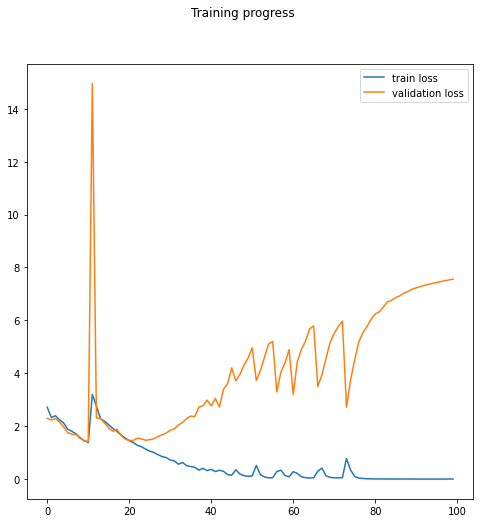

In [8]:
# Code for training loss vs. val loss
fig = plt.figure(figsize=(8,8))
plt.plot(hist2.history['loss'], label='train loss')
plt.plot(hist2.history['val_loss'], label='validation loss')
plt.legend();
fig.suptitle('Training progress')

Text(0.5, 0.98, 'Training progress')

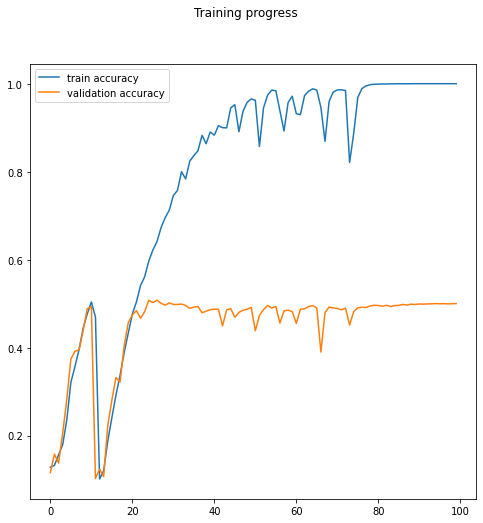

In [9]:
# Code for training acc vs. val acc
fig = plt.figure(figsize=(8,8))
plt.plot(hist2.history['accuracy'], label='train accuracy')
plt.plot(hist2.history['val_accuracy'], label='validation accuracy')
plt.legend();
fig.suptitle('Training progress')

For the above model, add a batch normalization layer **after each** Conv2D layer. 
* Batch normalization: layers.BatchNormalization()
* You should have two batch normalization layers in each Conv block
* Train this model on the cifar-10 data for 100 epochs and make predictions on the test data
* Create a checkpoint to save the best model (see [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/))
* Print the classification report and confusion matrix
* Plot training loss vs. validation loss
* Plot Training accuracy vs. validation accuracy 
* Did the results improve in comparison to the previous two models?


In [3]:
# Code for model 3
def cifar_clf3(input_shape=(32,32,3), n_classes=10):
    inx = Input(input_shape)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(inx)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(n_classes, activation='softmax')(x)
    return Model(inx, x)

clf_cifar3 = cifar_clf3()
clf_cifar3.summary()

# select loss function and optimizer
loss = losses.CategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=1e-2)
clf_cifar3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

# callback for saving model
MdlCpt3 = callbacks.ModelCheckpoint('cpt/convnet_cifar3', save_best_only=True)

hist3 = clf_cifar3.fit(train_images, train_labels, epochs=100, batch_size=512, shuffle=True, callbacks=[MdlCpt3], validation_data=(test_images, test_labels))

2022-11-02 21:43:07.043479: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 21:43:07.044844: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 21:43:07.207140: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 21:43:07.208255: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 21:43:07.209223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
batch_normalization_3 (Batch (None, 8, 8, 64)          256   

2022-11-02 21:43:13.635360: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-02 21:43:17.478032: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


98/98 [==============================] - 15s 28ms/step - loss: 1.7001 - accuracy: 0.4376 - val_loss: 2.9946 - val_accuracy: 0.2178


2022-11-02 21:43:30.007683: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
98/98 [==============================] - 2s 21ms/step - loss: 1.1017 - accuracy: 0.6061 - val_loss: 6.9979 - val_accuracy: 0.1440
Epoch 3/100
98/98 [==============================] - 2s 20ms/step - loss: 0.8732 - accuracy: 0.6891 - val_loss: 4.6482 - val_accuracy: 0.2485
Epoch 4/100
98/98 [==============================] - 2s 20ms/step - loss: 0.7058 - accuracy: 0.7483 - val_loss: 1.4290 - val_accuracy: 0.5743
Epoch 5/100
98/98 [==============================] - 2s 22ms/step - loss: 0.5755 - accuracy: 0.7946 - val_loss: 1.2075 - val_accuracy: 0.6509
Epoch 6/100
98/98 [==============================] - 2s 21ms/step - loss: 0.4592 - accuracy: 0.8365 - val_loss: 1.8934 - val_accuracy: 0.5468
Epoch 7/100
98/98 [==============================] - 2s 20ms/step - loss: 0.3788 - accuracy: 0.8652 - val_loss: 1.6119 - val_accuracy: 0.6286
Epoch 8/100
98/98 [==============================] - 2s 20ms/step - loss: 0.2948 - accuracy: 0.8947 - val_loss: 1.6973 - val_accuracy: 0.6171
Epoch 

In [5]:
image_pred = tf.argmax(clf_cifar3(test_images), axis=-1)
# Code for classification report and confusion matrix
print(classification_report(test_labels, image_pred))
print(confusion_matrix(test_labels, image_pred))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1000
           1       0.70      0.88      0.78      1000
           2       0.58      0.59      0.58      1000
           3       0.49      0.50      0.50      1000
           4       0.72      0.53      0.61      1000
           5       0.57      0.52      0.54      1000
           6       0.69      0.79      0.74      1000
           7       0.81      0.66      0.73      1000
           8       0.80      0.80      0.80      1000
           9       0.84      0.68      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000

[[817  30  40   8   7   3  13   8  55  19]
 [ 25 879   3   7   2   4  11   2  26  41]
 [ 96  16 594  59  46  51  83  26  23   6]
 [ 60  33  87 501  37 151  80  24  17  10]
 [ 45  15 111  77 528  60  91  43  21   9]
 [ 37  13  72 225  40 517 

Text(0.5, 0.98, 'Training progress')

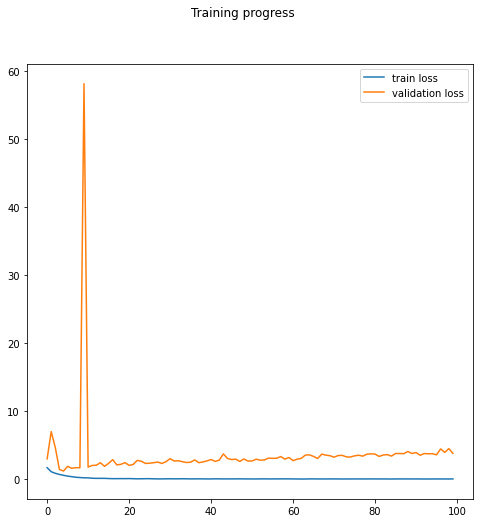

In [6]:
# Code for training loss vs. val loss
fig = plt.figure(figsize=(8,8))
plt.plot(hist3.history['loss'], label='train loss')
plt.plot(hist3.history['val_loss'], label='validation loss')
plt.legend();
fig.suptitle('Training progress')

Text(0.5, 0.98, 'Training progress')

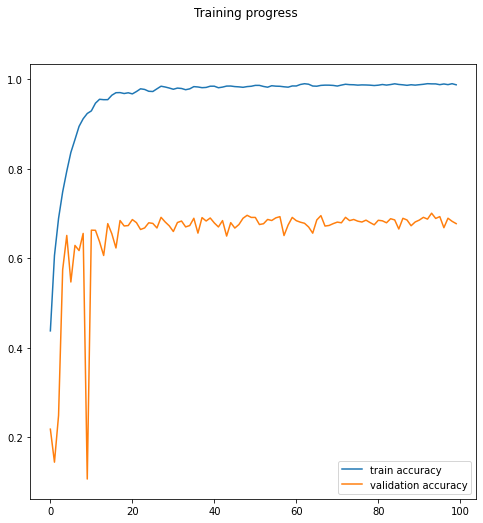

In [7]:
# Code for training acc vs. val acc
fig = plt.figure(figsize=(8,8))
plt.plot(hist3.history['accuracy'], label='train accuracy')
plt.plot(hist3.history['val_accuracy'], label='validation accuracy')
plt.legend();
fig.suptitle('Training progress')

Apply the following changes to the previous model: 
* In Conv block 0: add a Dropout layer with a rate of 0.1 after the second batch normalization layer 
* In Conv block 1: add a Dropout layer with a rate of 0.2 after the second batch normalization layer
* In Conv block 2: add a Dropout layer with a rate of 0.3 after the second batch normalization layer
* In Conv block 3: add a Dropout layer with a rate of 0.4 after the second batch normalization layer
* Add a Dropout layer after the Dense layer with rate 0.5 
* Dropout layer: layers.Dropout(rate)
* Train this model on the cifar-10 data for 100 epochs and make predictions on the test data
* Create a checkpoint to save the best model (see [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/))
* Print the classification report and confusion matrix
* Plot training loss vs. validation loss
* Plot Training accuracy vs. validation accuracy 
* Did the results improve in comparison to the previous models?



In [8]:
# Code for model 4 
def cifar_clf4(input_shape=(32,32,3), n_classes=10):
    inx = Input(input_shape)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(inx)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.1)(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.3)(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.4)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(n_classes, activation='softmax')(x)
    return Model(inx, x)

clf_cifar4 = cifar_clf4()
clf_cifar4.summary()

# select loss function and optimizer
loss = losses.CategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=1e-2)
clf_cifar4.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

# callback for saving model
MdlCpt4 = callbacks.ModelCheckpoint('cpt/convnet_cifar4', save_best_only=True)

hist4 = clf_cifar4.fit(train_images, train_labels, epochs=100, batch_size=512, shuffle=True, callbacks=[MdlCpt4], validation_data=(test_images, test_labels))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 8, 8, 64)          256 

In [10]:
image_pred = tf.argmax(clf_cifar4(test_images), axis=-1)
# Code for classification report and confusion matrix
print(classification_report(test_labels, image_pred))
print(confusion_matrix(test_labels, image_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1000
           1       0.88      0.88      0.88      1000
           2       0.75      0.62      0.68      1000
           3       0.62      0.56      0.59      1000
           4       0.75      0.73      0.74      1000
           5       0.64      0.74      0.69      1000
           6       0.76      0.88      0.81      1000
           7       0.86      0.79      0.82      1000
           8       0.92      0.83      0.87      1000
           9       0.83      0.84      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

[[862  14  19  14   6   5  12   7  26  35]
 [ 18 880   1   6   0   4  11   2  16  62]
 [ 80   3 623  48  88  62  67  16   3  10]
 [ 27   6  49 560  47 204  71  19   5  12]
 [ 25   1  41  54 727  32  66  45   6   3]
 [ 12   0  32 125  33 736 

Text(0.5, 0.98, 'Training progress')

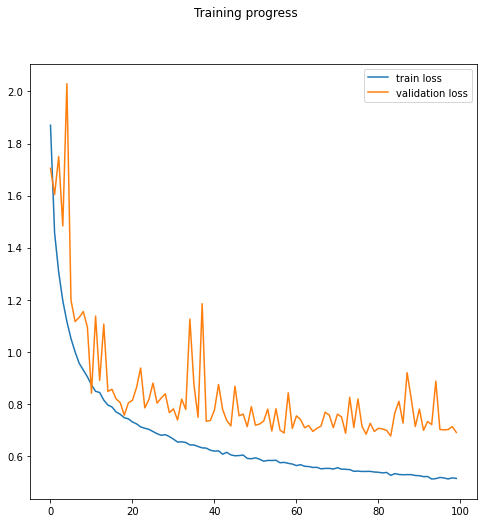

In [11]:
# Code for training loss vs. val loss
fig = plt.figure(figsize=(8,8))
plt.plot(hist4.history['loss'], label='train loss')
plt.plot(hist4.history['val_loss'], label='validation loss')
plt.legend();
fig.suptitle('Training progress')

Text(0.5, 0.98, 'Training progress')

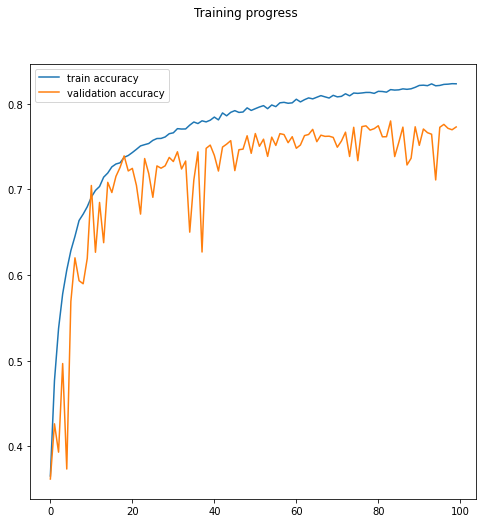

In [12]:
# Code for training acc vs. val acc
fig = plt.figure(figsize=(8,8))
plt.plot(hist4.history['accuracy'], label='train accuracy')
plt.plot(hist4.history['val_accuracy'], label='validation accuracy')
plt.legend();
fig.suptitle('Training progress')

Apply [image augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) to the previous model. You can use random translation, random flip, and random rotation. 
* Train this model on the cifar-10 data for 200 epochs and make predictions on the test data
* Create a checkpoint to save the best model (see [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/))
* Print the classification report and confusion matrix
* Plot training loss vs. validation loss
* Plot Training accuracy vs. validation accuracy 
* Did the results improve in comparison to the previous models?

In [6]:
# Code for image augmentation + the rest of the tasks mentioned above
# Code for model 5
def cifar_clf5(input_shape=(32,32,3), n_classes=10):
    inx = Input(input_shape)
    x = layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode="wrap")(inx)
    x = layers.RandomFlip("horizontal_and_vertical")(x)
    x = layers.RandomRotation(0.2)(x)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.1)(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.3)(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.4)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(n_classes, activation='softmax')(x)
    return Model(inx, x)

clf_cifar5 = cifar_clf5()
clf_cifar5.summary()

# select loss function and optimizer
loss = losses.CategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=1e-2)
clf_cifar5.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

# callback for saving model
MdlCpt5 = callbacks.ModelCheckpoint('cpt/convnet_cifar5', save_best_only=True)

hist5 = clf_cifar5.fit(train_images, train_labels, epochs=200, batch_size=512, shuffle=True, callbacks=[MdlCpt5], validation_data=(test_images, test_labels))

2022-11-02 22:09:45.192485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 22:09:45.193572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 22:09:45.342972: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 22:09:45.343870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 22:09:45.344811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
random_translation (RandomTr (None, 32, 32, 3)         0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 32, 32, 3)         0         
_________________________________________________________________
random_rotation (RandomRotat (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0     

2022-11-02 22:09:51.517613: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-11-02 22:09:55.105325: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


98/98 [==============================] - 15s 31ms/step - loss: 2.1571 - accuracy: 0.2423 - val_loss: 1.9867 - val_accuracy: 0.2578


2022-11-02 22:10:07.716422: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/200
98/98 [==============================] - 3s 26ms/step - loss: 1.9334 - accuracy: 0.2837 - val_loss: 1.8208 - val_accuracy: 0.3259
Epoch 3/200
98/98 [==============================] - 2s 24ms/step - loss: 1.8826 - accuracy: 0.3066 - val_loss: 1.8403 - val_accuracy: 0.3292
Epoch 4/200
98/98 [==============================] - 2s 23ms/step - loss: 1.8251 - accuracy: 0.3281 - val_loss: 2.0150 - val_accuracy: 0.2641
Epoch 5/200
98/98 [==============================] - 2s 23ms/step - loss: 1.7826 - accuracy: 0.3452 - val_loss: 1.7570 - val_accuracy: 0.3692
Epoch 6/200
98/98 [==============================] - 2s 24ms/step - loss: 1.7305 - accuracy: 0.3677 - val_loss: 1.6466 - val_accuracy: 0.3982
Epoch 7/200
98/98 [==============================] - 2s 23ms/step - loss: 1.7053 - accuracy: 0.3772 - val_loss: 1.6909 - val_accuracy: 0.4011
Epoch 8/200
98/98 [==============================] - 2s 23ms/step - loss: 1.6937 - accuracy: 0.3829 - val_loss: 1.8407 - val_accuracy: 0.3209
Epoch 

 Create 3D scatter plots (per class) of the first 3 principal components on:
 * Raw images 
 * Simple Convnet features
 * Features of the best performing model 

 Describe your observation from the three plots


In [14]:
# Code for the three different 3D scatter plots 